In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from pytorch_katas.settings import DATA_DIR

# Preparation

In [3]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = datasets.Food101(root=DATA_DIR, split="train", transform=train_transform, download=True)
test_dataset = datasets.Food101(root=DATA_DIR, split="test", transform=val_transform, download=True)

print(f"Train: {len(train_dataset)}, Test: {len(test_dataset)}")
print(f"Number of classes: {len(train_dataset.classes)}")

100%|██████████| 5.00G/5.00G [02:57<00:00, 28.1MB/s]


Train: 75750, Test: 25250
Number of classes: 101


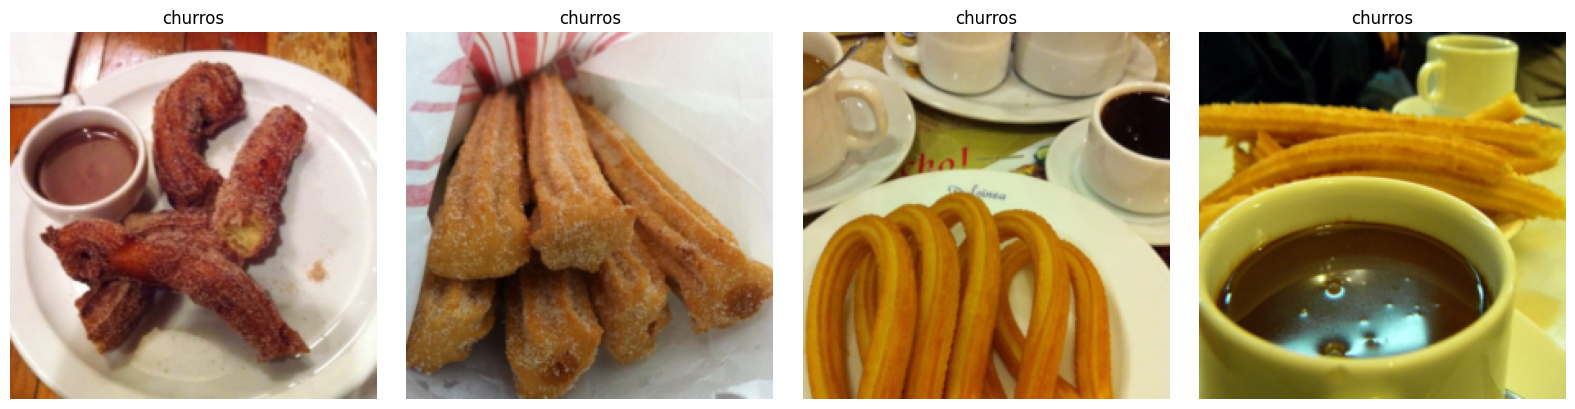

In [4]:
mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, ax in enumerate(axes):
    img, label = train_dataset[i]
    img = img * std + mean
    img = img.clamp(0, 1)
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(train_dataset.classes[label])
    ax.axis("off")
plt.tight_layout()
plt.show()

# Kata

Implement a simple Resnet

In [5]:
dl = DataLoader(train_dataset, batch_size=4, shuffle=True)
batch = next(iter(dl))

In [7]:
print(batch[1])

tensor([44, 84, 98, 84])
